In [12]:
import matplotlib.pyplot as plt
import pandas as pd 
import os

In [13]:
!pwd

/home/aiffel-dj19/kimoonpark


In [14]:
os.getenv('HOME')

'/home/aiffel-dj19'

In [15]:
data_path = os.getenv('HOME')+'/kimoonpark/silicon_valley_details.csv'

In [16]:
data = pd.read_csv(data_path)
data                 

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4435,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4436,Sanmina,2016,Overall_totals,NaN,Service workers,57
4437,Sanmina,2016,Overall_totals,NaN,Totals,5205
4438,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


In [47]:
# Adobe 직원의 직군 분포를 파이 그래프로 그리기(단, 인원이 0인 직군은 표시되지 않아야한다.)
filtered_data = data[(data['company']=='Adobe')&(data['count']!=0)&(data['job_category']!='Totals')&(data['job_category']!='Previous_totals')]
filtered_data

,company,year,race,gender,job_category,count
165,Adobe,2016,Hispanic_or_Latino,male,Executives,3
166,Adobe,2016,Hispanic_or_Latino,male,Managers,51
167,Adobe,2016,Hispanic_or_Latino,male,Professionals,75
169,Adobe,2016,Hispanic_or_Latino,male,Sales workers,33
170,Adobe,2016,Hispanic_or_Latino,male,Administrative support,8
...,...,...,...,...,...,...
333,Adobe,2016,Overall_totals,NaN,Executives,93
334,Adobe,2016,Overall_totals,NaN,Managers,2448
335,Adobe,2016,Overall_totals,NaN,Professionals,3028
337,Adobe,2016,Overall_totals,NaN,Sales workers,1270


In [48]:
job_cat_idx = filtered_data.value_counts('job_category').index.tolist()
job_cat_idx

['Managers',
 'Professionals',
 'Administrative support',
 'Sales workers',
 'Executives']

In [69]:
job_cat_cnt = []
for job_name in job_cat_idx:
    job_cat_cnt.append(filtered_data[filtered_data['job_category']==job_name]['count'].sum())
job_cat_cnt

[4896, 6056, 646, 2540, 186]

In [73]:
job_cat_df = pd.DataFrame(index=job_cat_idx)
job_cat_df['count']=job_cat_cnt
job_cat_df

,count
Managers,4896
Professionals,6056
Administrative support,646
Sales workers,2540
Executives,186


<AxesSubplot:ylabel='count'>

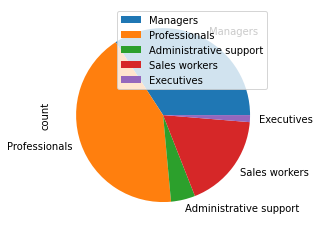

In [74]:
job_cat_df.plot(kind='pie', y='count', legend=job_cat_idx)

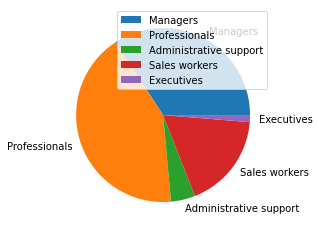

In [80]:
plt.pie(job_cat_df['count'], labels=job_cat_idx)
plt.legend(job_cat_idx)